<center><h3>Identifying mental health disorders with Artificial Intelligence using Natural Language Processing and Deep Learning Techniques</h3>
<br><h4>Zacharias Siatris</h4>
<h4>MSc in Artificial Intelligence
    The University of Bath<br>2022 - 2023</h4></center><br><br><br>

In [1]:
!pip install nltk
!pip install tensorflow
!pip install transformers
!pip install scikeras
!pip install wordcloud
!pip install textblob
!pip install gingerit
!pip install english-words

import time
import pandas as pd
import nltk
import re, string
import matplotlib.pyplot as plt
import numpy as np

from collections import OrderedDict
from textblob import Word
# from english_words import get_english_words_set

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import pipeline

from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('omw-1.4', quiet=True)

start_time = time.time()

In [2]:
pd.set_option('display.colheader_justify', 'center')
pd.set_option('expand_frame_repr', False)
np.set_printoptions(suppress=True)

english_stop_words = stopwords.words('english')

load_big_datasets = True

print_word_cloud_per_disorder = True

print_dataset_each_step = False
number_of_rows_to_print = 20

In [3]:
if load_big_datasets:

    BPD_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/BPD_Disorder_Dataset.csv')
    ANXIETY_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/Anxiety_Disorder_Dataset.csv')
    BIPOLAR_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/Bipolar_Disorder_Dataset.csv')
    DEPRESSION_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/Depression_Disorder_Dataset.csv')
    EATING_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/Eating_Disorder_Dataset.csv')
    GENERAL_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/General_Mental_Illnesses_Disorder_Dataset.csv')
    PSYCHOTIC_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/Schizophrenia_Disorder_Dataset.csv')
    GENDER_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files_Large_Datasets/Sexual_and_Gender_Identity_Disorder_Dataset.csv')

else:

    # os.getcwd()
    # #os.listdir()
    # read_csv(r'Path where the CSV file is stored\File name.csv')
    BPD_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/BPD_Disorder_Dataset.csv')
    ANXIETY_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/Anxiety_Disorder_Dataset.csv')
    BIPOLAR_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/Bipolar_Disorder_Dataset.csv')
    DEPRESSION_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/Depression_Disorder_Dataset.csv')
    EATING_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/Eating_Disorder_Dataset.csv')
    GENERAL_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/General_Mental_Illnesses_Disorder_Dataset.csv')
    PSYCHOTIC_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/Schizophrenia_Disorder_Dataset.csv')
    GENDER_dataframe = pd.read_csv(
        '/Users/ZachariasSiatris/Documents/UoB/Disorders/Datasets/CSV_Files/Sexual_and_Gender_Identity_Disorder_Dataset.csv')

# Merging dataframes
merged_dataframes = [BPD_dataframe, ANXIETY_dataframe, BIPOLAR_dataframe,
                     DEPRESSION_dataframe, EATING_dataframe, GENERAL_dataframe, PSYCHOTIC_dataframe, GENDER_dataframe]
# print(merged_dataframes)
merged_dataframes = pd.concat(merged_dataframes).reset_index(drop=True)

In [4]:
# Method to remove contractions
def removing_contractions(line):
    line = line.replace("’", "'")

    # Replacing abbreviations for mental health disorders
    line = re.sub(" aspd ", " antisocial personality disorder ", line)
    line = re.sub(" add ", " attention deficit disorder ", line)
    line = re.sub(" adhd ", " attention deficit hyperactivity disorder ", line)
    line = re.sub(" avpd ", " avoidant personality disorder ", line)
    line = re.sub(" bdd ", " body dysmorphic disorder ", line)
    line = re.sub(" bpd ", " borderline personality disorder ", line)
    line = re.sub(" crsd ", " circadian rhythm sleep disorder ", line)
    line = re.sub(" ednos ", " eating disorder not otherwise specified ", line)
    line = re.sub(" gad ", " generalized anxiety disorder ", line)
    line = re.sub(" nes ", " night eating syndrome ", line)
    line = re.sub(" mdd ", " major depressive disorder ", line)
    line = re.sub(" ocd ", " obsessive-compulsive disorder ", line)
    line = re.sub(" odd ", " oppositional defiant disorder ", line)
    line = re.sub(" ppd ", " paranoid personality disorder ", line)
    line = re.sub(" pted ", " post traumatic embitterment disorder ", line)
    line = re.sub(" ptsd ", " post traumatic stress disorder ", line)
    line = re.sub(" sza ", " schizoaffective disorder ", line)
    line = re.sub(" spd ", " schizoid personality disorder ", line)
    line = re.sub(" dae ", " does anybody else ", line)
    line = re.sub(" fp ", " favourite person ", line)


    # Replacing top slang words used in tweets, posts, etc.
    line = re.sub(" imma ", " I am going to ", line)
    line = re.sub(" wanna ", " I want to ", line)
    line = re.sub(" lemme ", " let me ", line)
    line = re.sub(" kinda ", " kind of ", line)
    line = re.sub(" init ", " is not it ", line)
    line = re.sub(" gotta ", " got to ", line)
    line = re.sub(" gonna ", " going to ", line)
    line = re.sub(" gona ", " going to ", line)
    line = re.sub(" gimme ", " give me ", line)
    line = re.sub(" yr ", " year ", line)
    line = re.sub(" yrs ", " years ", line)
    line = re.sub(" bc ", " because ", line)
    line = re.sub(" cuz ", " because ", line)
    line = re.sub(" idk ", " I do not know ", line)
    line = re.sub(" bf ", " boyfriend ", line)


    # lines with special character (')
    line = re.sub(r"ain't", "is not", line)
    line = re.sub(r"aren't", "are not", line)
    line = re.sub(r" arent ", " are not ", line)
    line = re.sub(r"can't", "cannot", line)
    line = re.sub(r" cant ", " cannot ", line)
    line = re.sub(r"can't've", "cannot have", line)
    line = re.sub(r"'cause", "because", line)
    line = re.sub(r"could've", "could have", line)
    line = re.sub(r"couldn't", "could not", line)
    line = re.sub(r" couldnt ", " could not ", line)
    line = re.sub(r"couldn't've", "could not have", line)
    line = re.sub(r"didn't", "did not", line)
    line = re.sub(r" didnt ", " did not ", line)
    line = re.sub(r"doesn't", "does not", line)
    line = re.sub(r" doesnt ", " does not ", line)
    line = re.sub(r"don't", "do not", line)
    line = re.sub(r" dont ", " do not ", line)
    line = re.sub(r"hadn't", "had not", line)
    line = re.sub(r" hadnt ", " had not ", line)
    line = re.sub(r"hadn't've", "had not have", line)
    line = re.sub(r"hasn't", "has not", line)
    line = re.sub(r" hasnt ", " has not ", line)
    line = re.sub(r"haven't", "have not", line)
    line = re.sub(r" havent ", " have not ", line)
    line = re.sub(r"he'd", "he would", line)
    line = re.sub(r"he'd've", "he would have", line)
    line = re.sub(r"he'll", "he will", line)
    line = re.sub(r"he'll've", "he he will have", line)
    line = re.sub(r"he's", "he is", line)
    line = re.sub(r"how'd", "how did", line)
    line = re.sub(r"how'd'y", "how do you", line)
    line = re.sub(r"how'll", "how will", line)
    line = re.sub(r"how's", "how is", line)
    line = re.sub(r" hows ", " how is ", line)
    line = re.sub(r"i'd", "i would", line)
    line = re.sub(r"i'd've", "i would have", line)
    line = re.sub(r"i'll", "i will", line)
    line = re.sub(r"i'll've", "i will have", line)
    line = re.sub(r"i'm", "i am", line)
    line = re.sub(r" im ", " i am ", line)
    line = re.sub(r"i've", "i have", line)
    line = re.sub(r" ive ", " i have ", line)
    line = re.sub(r"isn't", "is not", line)
    line = re.sub(r" isnt ", " is not ", line)
    line = re.sub(r"it'd", "it would", line)
    line = re.sub(r"it'd've", "it would have", line)
    line = re.sub(r"it'll", "it will", line)
    line = re.sub(r"it'll've", "it will have", line)
    line = re.sub(r"it's", "it is", line)
    line = re.sub(r"let's", "let us", line)
    line = re.sub(r" lets ", " let us ", line)
    line = re.sub(r"ma'am", "madam", line)
    line = re.sub(r"mayn't", "may not", line)
    line = re.sub(r"might've", "might have", line)
    line = re.sub(r"mightn't", "might not", line)
    line = re.sub(r"mightn't've", "might not have", line)
    line = re.sub(r"must've", "must have", line)
    line = re.sub(r"mustn't", "must not", line)
    line = re.sub(r" mustnt ", " must not ", line)
    line = re.sub(r"mustn't've", "must not have", line)
    line = re.sub(r"needn't", "need not", line)
    line = re.sub(r" neednt ", " need not ", line)
    line = re.sub(r"needn't've", "need not have", line)
    line = re.sub(r"no where", "nowhere", line)
    line = re.sub(r"o'clock", "of the clock", line)
    line = re.sub(r"oclock", "of the clock", line)
    line = re.sub(r"oughtn't", "ought not", line)
    line = re.sub(r"oughtn't've", "ought not have", line)
    line = re.sub(r"shan't", "shall not", line)
    line = re.sub(r"sha'n't", "shall not", line)
    line = re.sub(r"shan't've", "shall not have", line)
    line = re.sub(r"she'd", "she would", line)
    line = re.sub(r"she'd've", "she would have", line)
    line = re.sub(r"she'll", "she will", line)
    line = re.sub(r"she'll've", "she will have", line)
    line = re.sub(r"she's", "she is", line)
    line = re.sub(r"should've", "should have", line)
    line = re.sub(r"shouldn't", "should not", line)
    line = re.sub(r" shouldnt ", " should not ", line)
    line = re.sub(r"shouldn't've", "should not have", line)
    line = re.sub(r"so've", "so have", line)
    line = re.sub(r"so's", "so as", line)
    line = re.sub(r"that'd", "that would", line)
    line = re.sub(r"that'd've", "that would have", line)
    line = re.sub(r"that's", "that is", line)
    line = re.sub(r" thats ", " that is ", line)
    line = re.sub(r"there'd", "there would", line)
    line = re.sub(r"there'd've", "there would have", line)
    line = re.sub(r"there's", "there is", line)
    line = re.sub(r"theres", "there is", line)
    line = re.sub(r"they'd", "they would", line)
    line = re.sub(r"they'd've", "they would have", line)
    line = re.sub(r"they'll", "they will", line)
    line = re.sub(r"they'll've", "they will have", line)
    line = re.sub(r"they're", "they are", line)
    line = re.sub(r"they've", "they have", line)
    line = re.sub(r"to've", "to have", line)
    line = re.sub(r"wasn't", "was not", line)
    line = re.sub(r" wasnt ", " was not ", line)
    line = re.sub(r"we'd", "we would", line)
    line = re.sub(r"we'd've", "we would have", line)
    line = re.sub(r"we'll", "we will", line)
    line = re.sub(r"we'll've", "we will have", line)
    line = re.sub(r"we're", "we are", line)
    line = re.sub(r"we've", "we have", line)
    line = re.sub(r"weren't", "were not", line)
    line = re.sub(r" werent ", " were not ", line)
    line = re.sub(r"what'll", "what will", line)
    line = re.sub(r"what'll've", "what will have", line)
    line = re.sub(r"what're", "what are", line)
    line = re.sub(r"what's", "what is", line)
    line = re.sub(r" whats ", " what is ", line)
    line = re.sub(r"what've", "what have", line)
    line = re.sub(r"when's", "when is", line)
    line = re.sub(r"when've", "when have", line)
    line = re.sub(r"where'd", "where did", line)
    line = re.sub(r"where's", "where is", line)
    line = re.sub(r"where've", "where have", line)
    line = re.sub(r"who'll", "who will", line)
    line = re.sub(r"who'll've", "who will have", line)
    line = re.sub(r"who's", "who is", line)
    line = re.sub(r"who've", "who have", line)
    line = re.sub(r"why's", "why is", line)
    line = re.sub(r"why've", "why have", line)
    line = re.sub(r"will've", "will have", line)
    line = re.sub(r"won't", "will not", line)
    line = re.sub(r" wont ", " will not ", line)
    line = re.sub(r"won't've", "will not have", line)
    line = re.sub(r"would've", "would have", line)
    line = re.sub(r"wouldn't", "would not", line)
    line = re.sub(r" wouldnt ", " would not ", line)
    line = re.sub(r"wouldn't've", "would not have", line)
    line = re.sub(r"y'all", "you all", line)
    line = re.sub(r"y'all'd", "you all would", line)
    line = re.sub(r"y'all'd've", "you all would have", line)
    line = re.sub(r"y'all're", "you all are", line)
    line = re.sub(r"y'all've", "you all have", line)
    line = re.sub(r"you'd", "you would", line)
    line = re.sub(r"you'd've", "you would have", line)
    line = re.sub(r"you'll", "you will", line)
    line = re.sub(r"you'll've", "you will have", line)
    line = re.sub(r"you're", "you are", line)
    line = re.sub(r" youre ", " you are ", line)
    line = re.sub(r"you've", "you have", line)

    return line


# function to remove non-ASCII
def remove_non_ascii(text):
    return ''.join(char for char in text if ord(char) < 128)


def spell_checking(word):
    result = Word(word)
    print(result.spellcheck())


# Method to clear out rows with empty cells, replace non-ASCII characters and remove contractions
def pre_processing_data(dataframe):
    # Deleting rows from the dataset where rows are empty
    dataframe = dataframe.dropna()

    # Deleting duplicate rows from the dataset
    dataframe = dataframe.drop_duplicates()

    # Applying ASCII encoding first flagging data with errors="ignore" flag, then subsequently decoding it into ASCII
    dataframe['text'] = dataframe['text'].apply(remove_non_ascii)

    # Removing newline characters
    dataframe['text'] = dataframe['text'].replace(r'\n', ' ', regex=True)

    # Removing the character reference "An ampersand"
    dataframe['text'] = dataframe['text'].replace('&amp;', ' ', regex=True)

    # Converts uppercase characters to lowercase
    dataframe['text'] = dataframe['text'].str.lower()

    # web2lowerset = get_english_words_set(['web2'], lower=True)
    #
    # dataframe = dataframe.loc[dataframe['text'].str.split().isin(list(web2lowerset))]

    # parser = GingerIt()
    #
    # for index, row in dataframe.iterrows():
    #     if len(row['text']) < 300:
    #         test = parser.parse(row['text'])['result']
    #         row['text'] = test
    # test = parser.parse(row['text'])
    # print("Old row" + str(row['text']) + "\n")
    # print("New row" + str(test['result']) + "\n")

    # Replacing contractions to original words
    dataframe['text'] = dataframe['text'].apply(removing_contractions)

    return dataframe


# Method to remove emoticons, flags and special characters
def remove_emojis(line):
    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese char
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"
                      u"\u3030"
                      "]+", re.UNICODE)

    return re.sub(emoj, '', line)


# Method to remove noise from the data (meaning: stop words, emojis and special characters, urls, etc.)
def remove_noise(dataframe, stop_words):
    dataframe['text'] = dataframe['text'].str.replace('\d+', '', regex=True)
    dataframe['text'] = dataframe['text'].apply(lambda x: re.split('http.*', str(x))[0])

    for index, row in dataframe.iterrows():
        cleaned_phrase = []

        for word in row['text'].split():
            word = re.sub('(@[A-Za-z0-9_]+)', '', word)
            word = remove_emojis(word)

            if len(word) > 1 and word not in string.punctuation and word not in stop_words:
                cleaned_phrase.append(word)

        dataframe.at[index, 'text'] = " ".join(cleaned_phrase)

    return dataframe


# Method to tokenize the text into tokens (words)
def tokenize_dataframe(dataframe):
    for index, row in dataframe.iterrows():
        row['text'] = nltk.word_tokenize(row['text'])

    # dataframe.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

    return dataframe


# Method to unify words into text and remove duplicates. Also it removes rows that have only few words as context (
# using 10 as minimum threshold)
def remove_rows_with_few_words(dataframe):
    # print("ENTERED ROWS:\n\n")
    # print(dataframe.shape)
    # print(dataframe)
    dataframe['text'] = (dataframe['text'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))

    # print("\nAFTER removing duplicate words:\n\n")
    # print(dataframe.shape)
    # print(dataframe)
    dataframe = dataframe.loc[dataframe['text'].str.count(' ').gt(10)]

    # print("\nFINISHED ROWS:\n\n")
    # print(dataframe.shape)
    # print(dataframe)

    # for index, row in dataframe.iterrows():
    #     for word in row['text'].split():
    #         spell_checking(word)
    return dataframe


# Method to lemmatize each word in the text column of the dataframe
def lemmatize_sentence(dataframe):
    lemmatizer = WordNetLemmatizer()

    for index, row in dataframe.iterrows():
        lemmatized_phrase = []

        for word, tag in pos_tag(row['text']):
            if tag.startswith('NN'):
                pos = 'n'
            elif tag.startswith('VB'):
                pos = 'v'
            else:
                pos = 'a'
            lemmatized_phrase.append(lemmatizer.lemmatize(word, pos))

        dataframe.at[index, 'text'] = " ".join(lemmatized_phrase)

    return dataframe


# Method from hugging face (transformers) that uses a pre-trained NLP model to classify a context as positive or
# negative
def sentiment_analysis(dataframe):
    sentiment_classifier = pipeline("text-classification")
    dataframe['sentiment'] = 'LOL'
    # dataframe['sentiment'] = [sentiment_classifier(' '.join(row), max_length=512)[0].get('label') for row in
    # dataframe['text']]
    return dataframe


# def sentiment_analysis(dataframe):

#     mental_disorder_labels = ["BPD", "Borderline personality disorder", "mental health disorder",
#     "mental health issue"]
#     multi_label_classifier = pipeline("zero-shot-classification")
#     multi_label_classifier(sequence, mental_disorder_labels, multi_class=True)

#     for index, row in dataframe.iterrows():
#         print(index)
#         #         print(index, row)
# #         print("\n")
#         sentiment = classifier(' '.join(row['text']), new_candidate_labels)
#         print(sentiment)
# #         print("\n")
# #         print("sentiment.get('scores')[0]:" + str(sentiment.get('scores')[0]) + "\n")
# #         print("sentiment.get('scores')[1]:" + str(sentiment.get('scores')[1]) + "\n")
#         if sentiment.get('scores')[0]:
#             row['sentiment'] = new_candidate_labels[0]
# #             print("new_candidate_labels[0]:" + str(new_candidate_labels[0]) + "\n")
#         else:
#             row['sentiment'] = new_candidate_labels[1]
#             print("new_candidate_labels[1]:" + str(new_candidate_labels[1]) + "\n")
#         time.sleep(10)
#     return dataframe

def print_dataset(dataframe, number_of_rows):
    print("Printing first " + str(number_of_rows) + " rows of the dataframe:\n")
    print(dataframe.head(number_of_rows))


def initiate_nlp(dataframe):
    if print_dataset_each_step:
        print_dataset(dataframe, number_of_rows_to_print)

    # Starting with the first method for processing the data (STEP 1)
    print("\n\nSTEP 1 STARTED: Pre-processing dataset\n")
    dataframe = pre_processing_data(dataframe)

    if print_dataset_each_step:
        print_dataset(dataframe, number_of_rows_to_print)

    # Tokenizing the data (STEP 3)
    print("\n\nSTEP 2 STARTED: Tokenizing dataset\n")
    dataframe = tokenize_dataframe(dataframe)

    if print_dataset_each_step:
        print_dataset(dataframe, number_of_rows_to_print)

    # Lemmatizing the data of the dataframe (STEP 5)
    print("\n\nSTEP 3 STARTED: Lemmatizing dataset\n")
    dataframe = lemmatize_sentence(dataframe)

    if print_dataset_each_step:
        print_dataset(dataframe, number_of_rows_to_print)

    # Removing noise (STEP 2)
    print("\n\nSTEP 4 STARTED: Removing noise from the dataset\n")
    dataframe = remove_noise(dataframe, english_stop_words)

    if print_dataset_each_step:
        print_dataset(dataframe, number_of_rows_to_print)

    # Removing rows with few words as context (STEP 4)
    print("\n\nSTEP 5 STARTED: Removing rows with few words from the dataset\n")
    dataframe = remove_rows_with_few_words(dataframe)

    if print_dataset_each_step:
        print_dataset(dataframe, number_of_rows_to_print)

    # Deleting rows after the processing where cells are empty (if any)
    dataframe = dataframe.dropna()

    # Using transformers NLP model to classify the context of being positive or negative
    print("\n\nSTEP 6 STARTED: Sentiment Analysis on the dataset\n")
    dataframe = sentiment_analysis(dataframe)

    if print_dataset_each_step:
        print_dataset(dataframe, number_of_rows_to_print)

    return dataframe


merged_dataframes = initiate_nlp(merged_dataframes)



STEP 1 STARTED: Pre-processing dataset



STEP 2 STARTED: Tokenizing dataset



STEP 3 STARTED: Lemmatizing dataset



STEP 4 STARTED: Removing noise from the dataset



STEP 5 STARTED: Removing rows with few words from the dataset



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.




STEP 6 STARTED: Sentiment Analysis on the dataset



All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [5]:
# # Method to keep unique words in each row of dataset
# def drop_duplicates(row):
# #     words = row.split(', ')
#     return ', '.join(np.unique(row.split(', ')).tolist())


# Method to create plot with the most used words per mental health disorder
def create_word_cloud(label):
    features = " ".join(review for review in merged_dataframes.loc[merged_dataframes['mental_health_disorder'] == label].text)
    features = ' '.join(np.unique(features).tolist())
    wordcloud = WordCloud(max_font_size=40, max_words=100, background_color="white", stopwords=english_stop_words).generate(
        features) 
    plt.figure(figsize=[20, 10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

<center><h1> WORD CLOUD PLOTS </h1></center>
<!--     <h4></h4> -->
    <br>
A <b>word cloud</b> is a data visualization technique that shows the most used words in a list given as input. If you wish to see the word cloud images make sure you have set the variable <i>print_word_cloud_per_disorder</i> to <b>True</b>

<h3> ANXIETY DISORDER </h3>

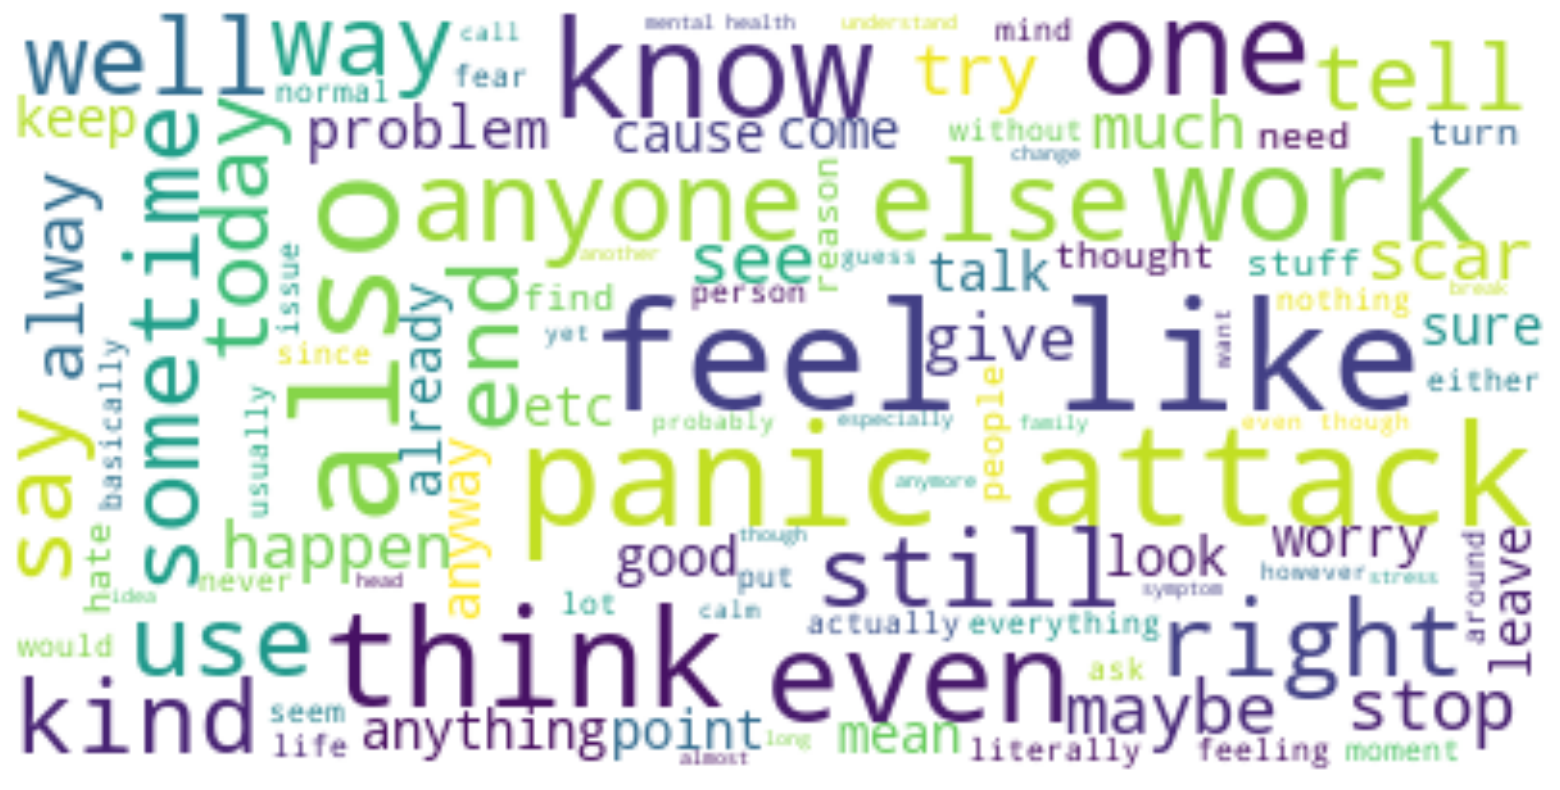

In [6]:
if print_word_cloud_per_disorder:
    create_word_cloud('Anxiety')

<h3> BIPOLAR DISORDER </h3>

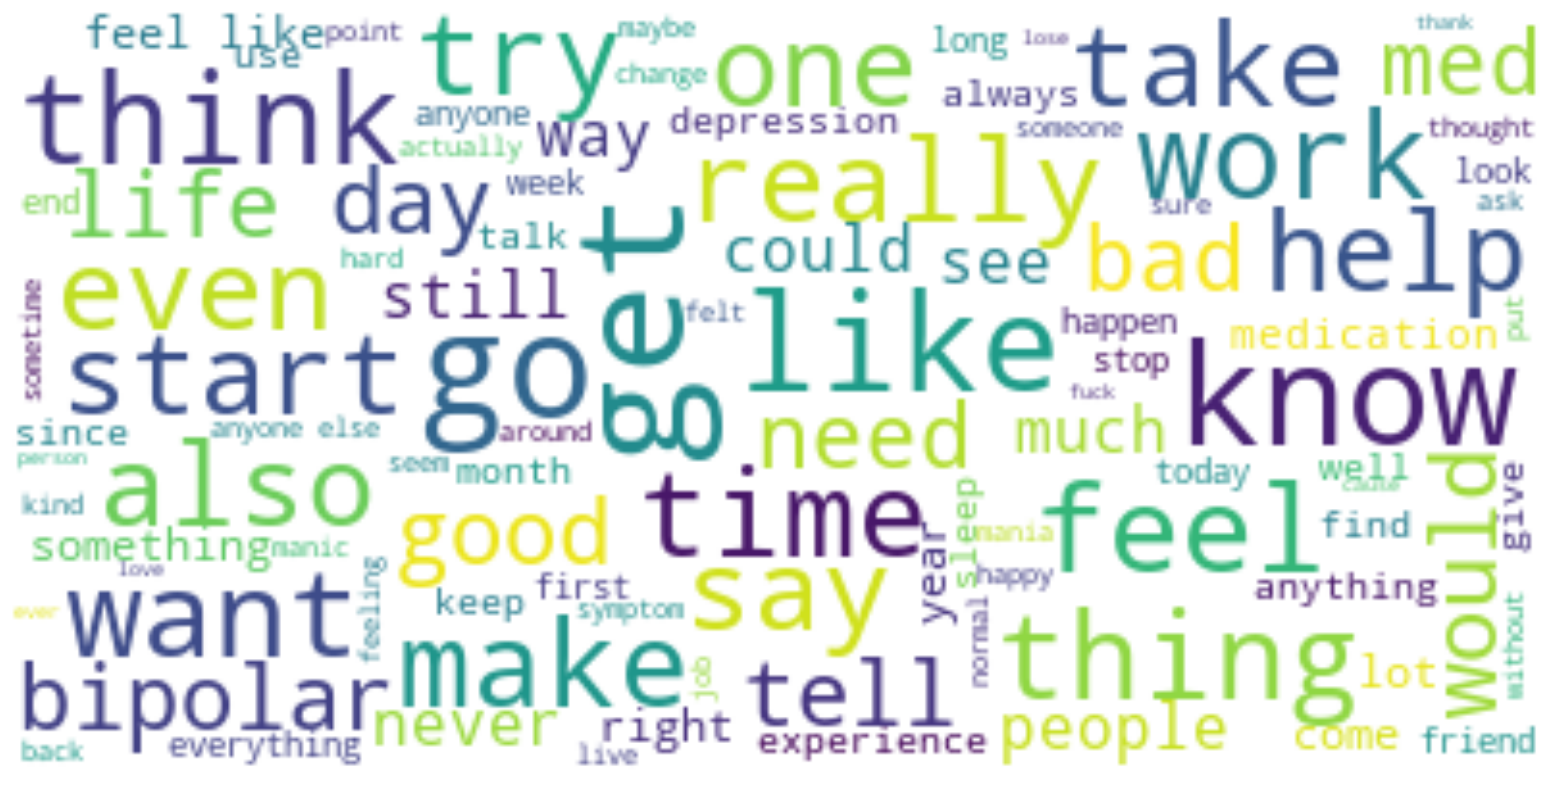

In [7]:
if print_word_cloud_per_disorder:
    create_word_cloud('Bipolar')

<h3> BORDERLINE PERSONALITY DISORDER </h3>

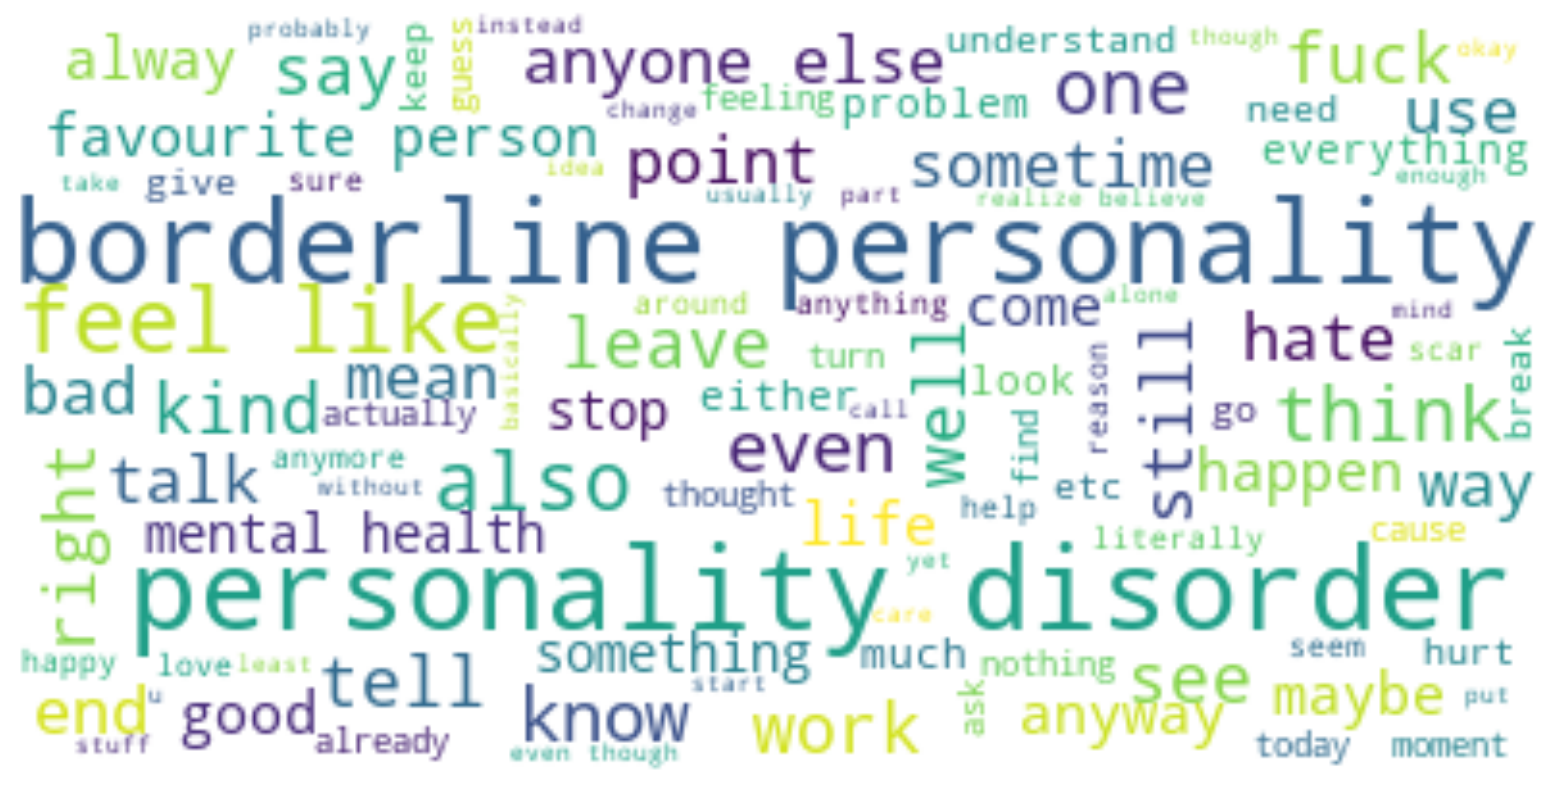

In [8]:
if print_word_cloud_per_disorder:
    create_word_cloud('Bpd')

<h3> DEPRESSION DISORDER </h3>

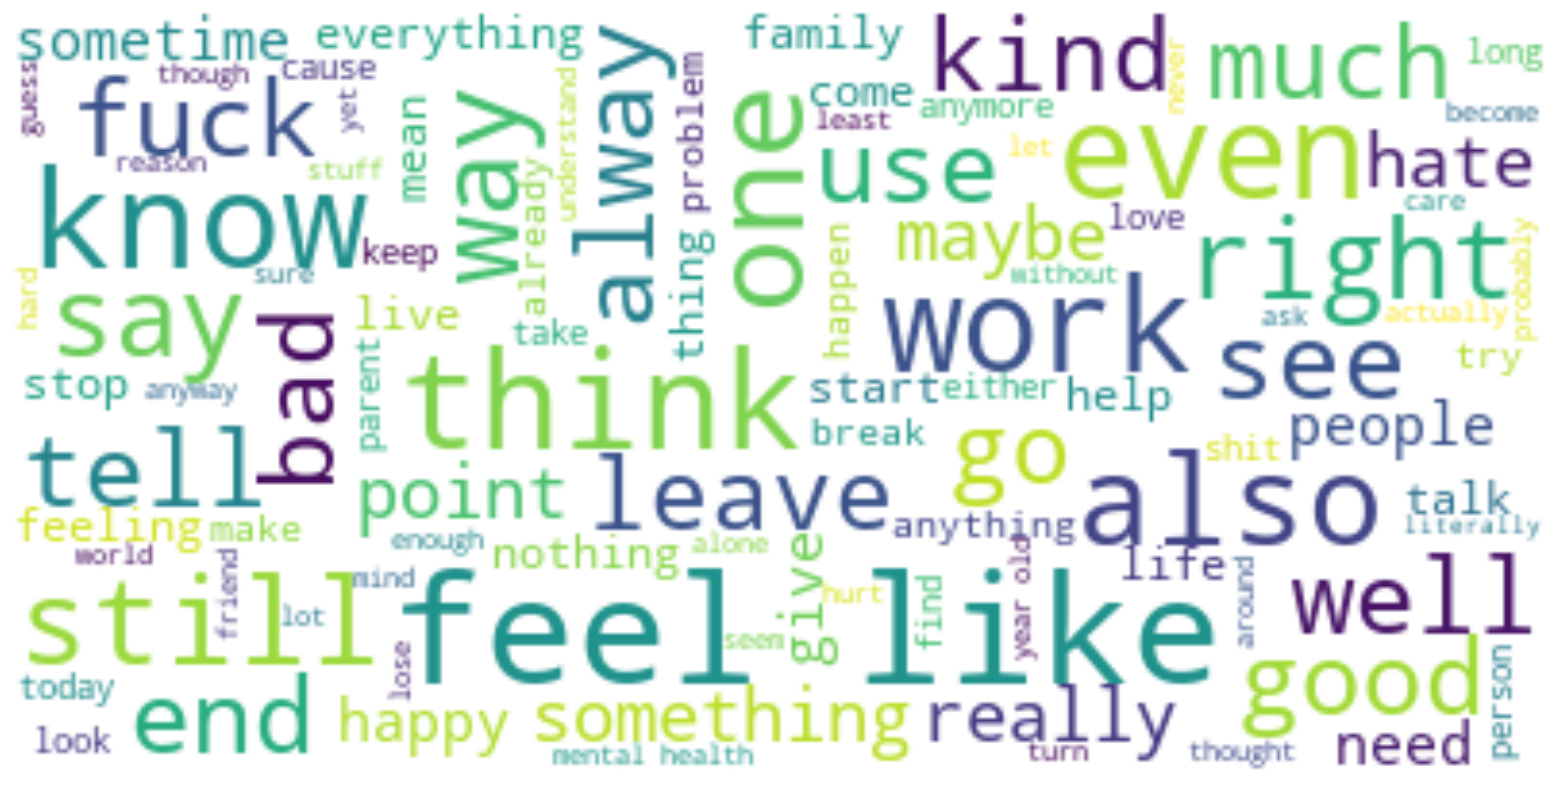

In [9]:
if print_word_cloud_per_disorder:
    create_word_cloud('Depression')

<h3> EATING DISORDER </h3>

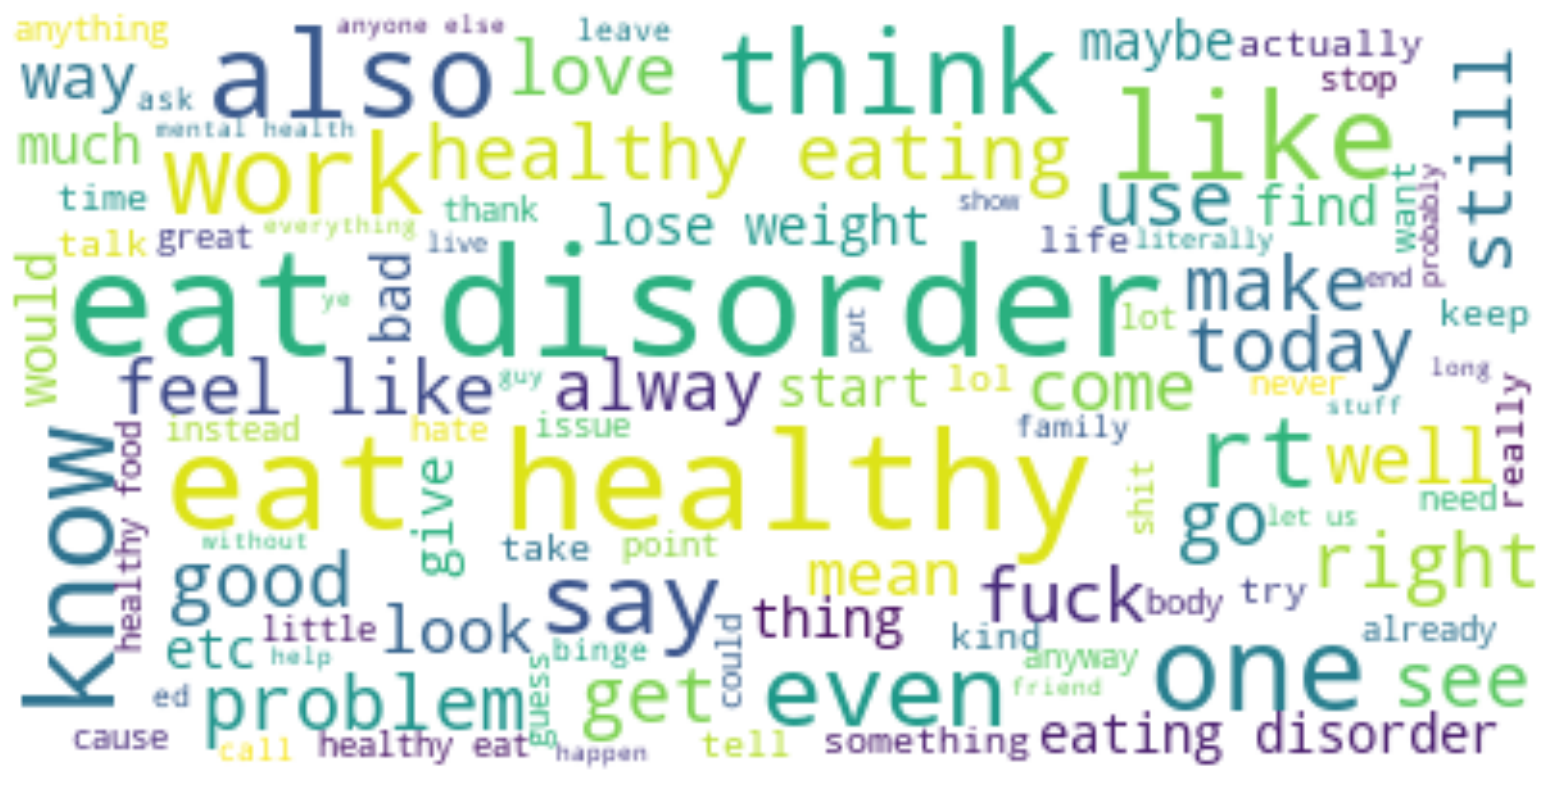

In [10]:
if print_word_cloud_per_disorder:
    create_word_cloud('Eating_disorder')

<h3> SCHIZOPHRENIA DISORDER </h3>

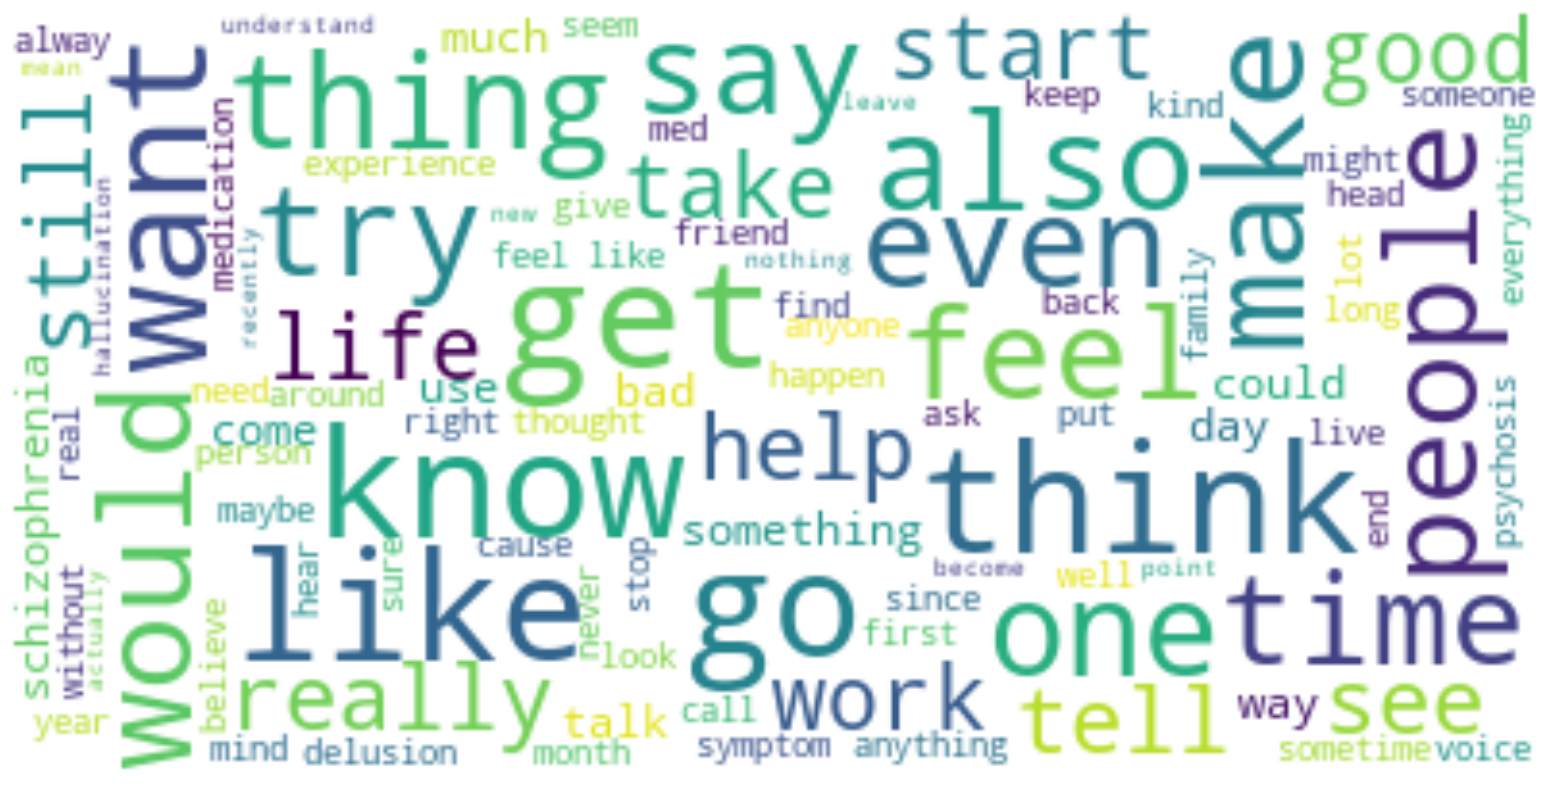

In [11]:
if print_word_cloud_per_disorder:
    create_word_cloud('Schizophrenia')

<h3> SEXUAL & GENDER IDENTITY DISORDER </h3>

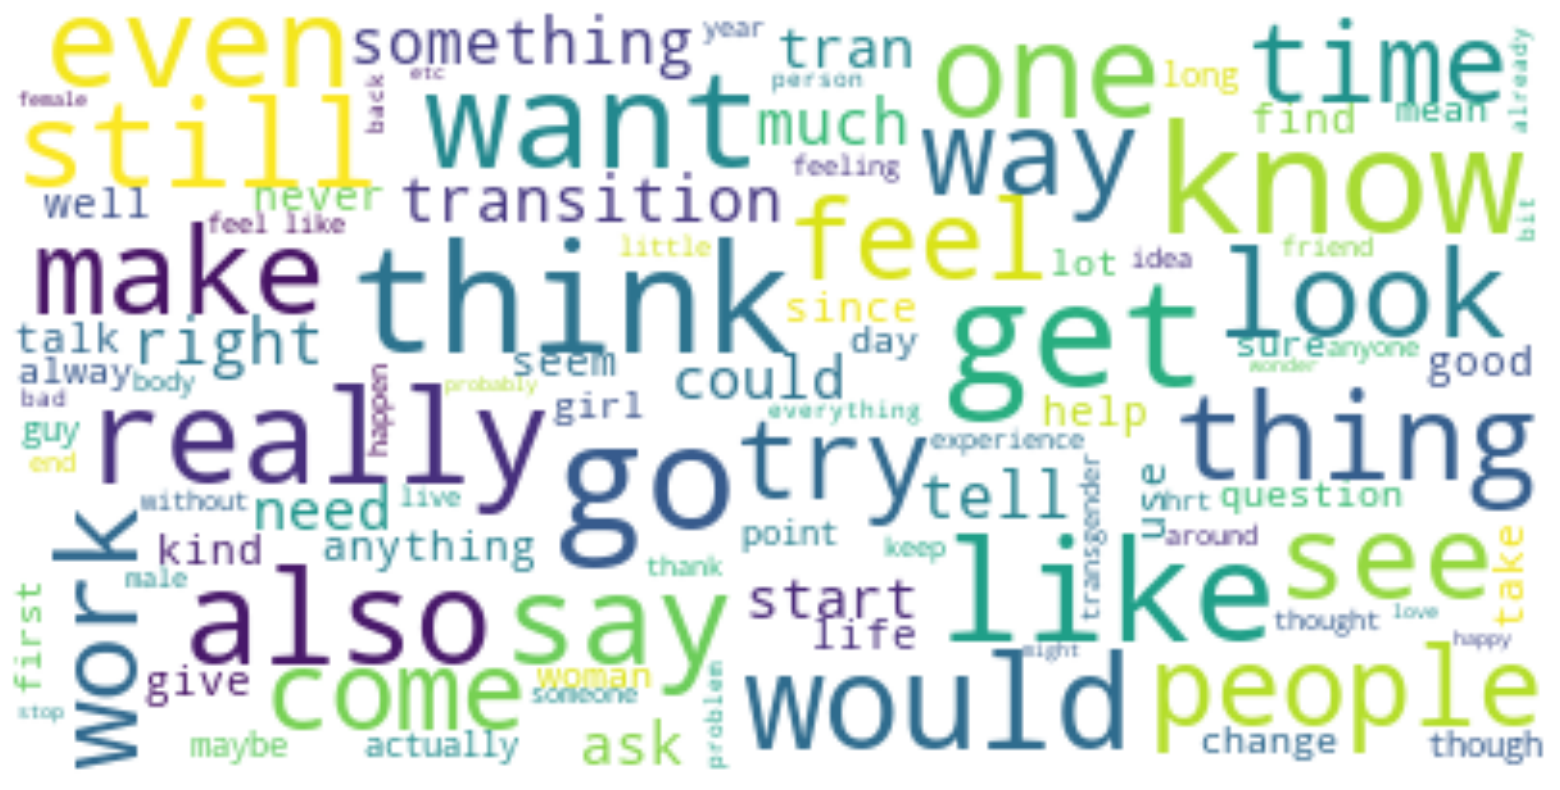

In [12]:
if print_word_cloud_per_disorder:
    create_word_cloud('Gender_Dysphoria_Disorder')

<h3> GENERAL MENTAL HEALTH DISORDER </h3>

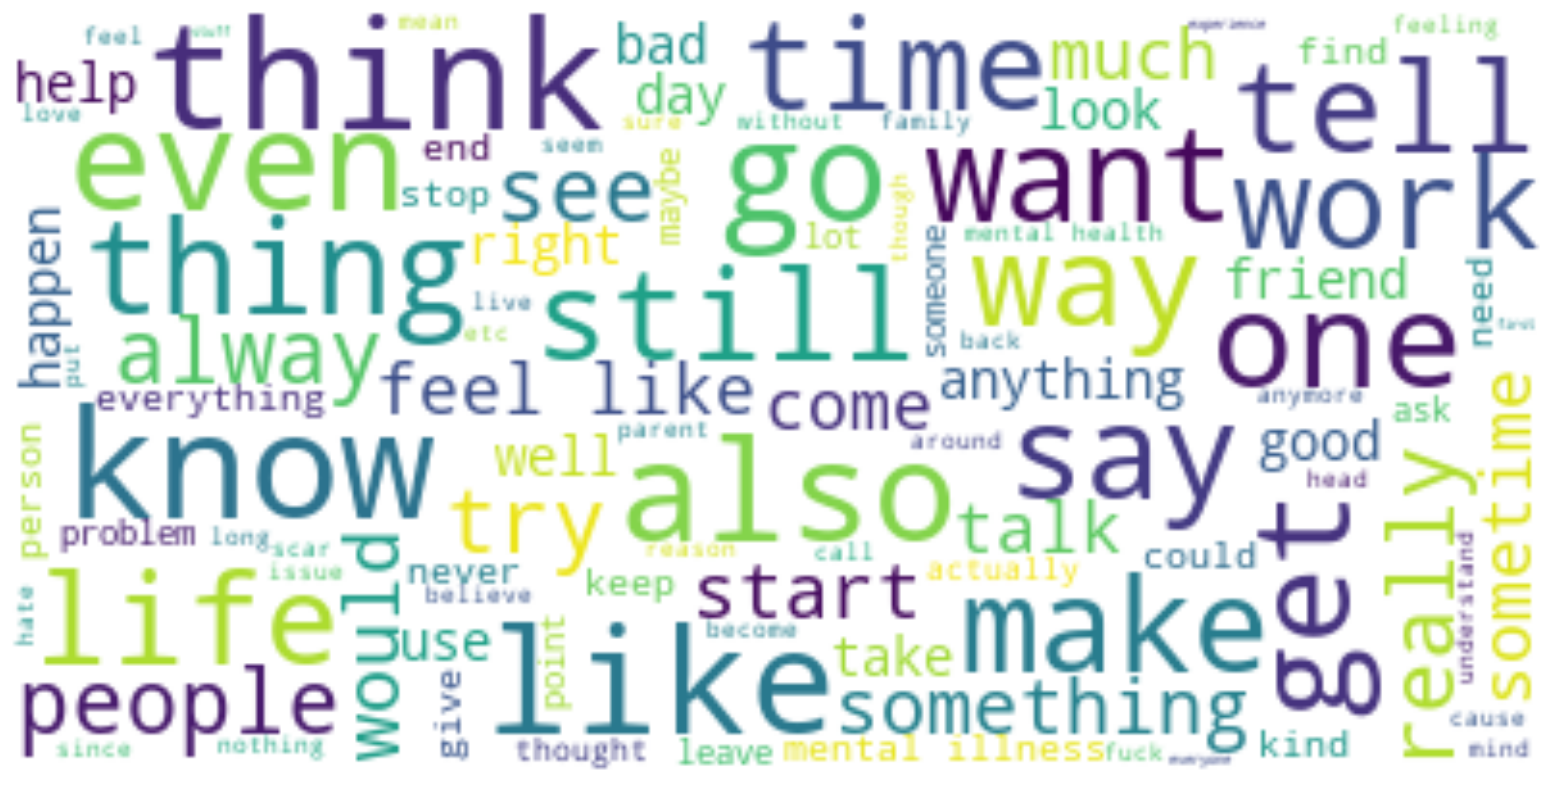

In [13]:
if print_word_cloud_per_disorder:
    create_word_cloud('General_disorder')

<center><h1> TF-IDF MODEL </h1>

In [14]:
# bag of words model using TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.02, max_df=0.98, ngram_range=(1, 2), stop_words='english')
X = merged_dataframes['text']
Y = merged_dataframes['mental_health_disorder']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# print(X)
# print(np.shape(X))
# print(np.shape(X_train))
x_train_2 = vectorizer.fit_transform(X_train).todense()
x_test_2 = vectorizer.transform(X_test).todense()


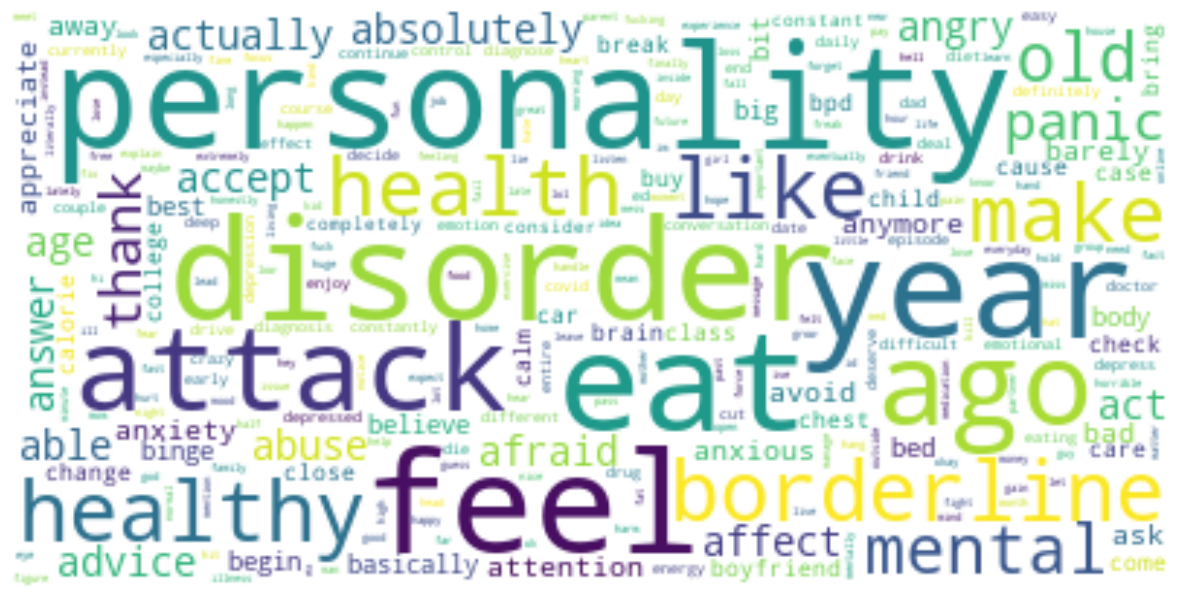

In [15]:
# Word Cloud Using Tf-IDF Bags of Word Model
features = " ".join(review for review in vectorizer.get_feature_names_out())
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white", stopwords=english_stop_words).generate(
    features)
plt.figure(figsize=[15, 12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<center><h1>Deep Learning Model</h1>   

In [16]:
'''
In Python, the random.seed function generates “random numbers.” However, random numbers are not truly random. 
The numbers generated are pseudorandom, meaning the numbers are generated by a complicated formula that makes it look random. 
In order to generate numbers, the formula takes the previous value generated as its input. 

If there is no previous value generated, it often takes the time as a first value. That is why we seed the generator — to make 
sure that we always get the same random numbers. We provide a fixed value that the number generator can start with, which is 
zero in this case.

'''
np.random.seed(0)
nb_classes = 8
batch_size = 64
nb_epochs = 20

encoder = LabelEncoder()
encoder.fit(y_train)

encoded_Y = encoder.transform(y_train)
Y_train = np_utils.to_categorical(encoded_Y, nb_classes)

In [17]:
# MODEL
model = Sequential()
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [18]:
# Model Training
model.fit(x_train_2, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1)

Epoch 1/20
9733/9733 [==============================] - 124s 13ms/step - loss: 0.1424
Epoch 2/20
9733/9733 [==============================] - 125s 13ms/step - loss: 0.1323
Epoch 3/20
9733/9733 [==============================] - 129s 13ms/step - loss: 0.1292
Epoch 4/20
9733/9733 [==============================] - 123s 13ms/step - loss: 0.1268
Epoch 5/20
9733/9733 [==============================] - 128s 13ms/step - loss: 0.1249
Epoch 6/20
9733/9733 [==============================] - 122s 13ms/step - loss: 0.1230
Epoch 7/20
9733/9733 [==============================] - 127s 13ms/step - loss: 0.1212
Epoch 8/20
9733/9733 [==============================] - 136s 14ms/step - loss: 0.1196
Epoch 9/20
9733/9733 [==============================] - 127s 13ms/step - loss: 0.1181
Epoch 10/20
9733/9733 [==============================] - 126s 13ms/step - loss: 0.1169
Epoch 11/20
9733/9733 [==============================] - 124s 13ms/step - loss: 0.1154
Epoch 12/20
9733/9733 [=============================

In [19]:
y_train_predclass = model.predict(x_train_2, batch_size=batch_size)

y_test_predclass = model.predict(x_test_2, batch_size=batch_size)

# print(pd.DataFrame(y_train_predclass, columns=encoder.classes_))

# print(Y_train[0:5])
# print(y_train[0:5])
# print(y_test_predclass)
# print(pd.DataFrame(x_test_2, columns = vectorizer.get_feature_names_out()))
# print(pd.DataFrame(y_test_predclass, columns=encoder.classes_))
# print(X_test.iloc[3])
# print(y_test.iloc[3])

# print ("nnDeep Neural Network - Train accuracy:"), (round(accuracy_score(y_train, y_train_predclass),3))

# # print ("nDeep Neural Network - Test accuracy:"), (round(accuracy_score(y_test,y_test_predclass),3))

# print ("nDeep Neural Network - Train Classification Report")

# print (classification_report(y_train, y_train_predclass))

# print ("nDeep Neural Network - Test Classification Report")

# print (classification_report(y_test, y_test_predclass))


x = np.argmax(y_train_predclass, axis=1)
x = [encoder.classes_[i] for i in x]


print()
print("Deep Neural Network - Train accuracy:" + str(round(accuracy_score(y_train, x), 4)))
print("Deep Neural Network - Train Classification Report\n")
print(classification_report(y_train, x))

print("\n\n***********************************\n\n")

y = np.argmax(y_test_predclass, axis=1)
y = [encoder.classes_[i] for i in y]

print()
print("Deep Neural Network - Test accuracy:" + str(round(accuracy_score(y_test, y), 4)))
print("Deep Neural Network - Test Classification Report\n")
print(classification_report(y_test, y))

2434/2434 [==============================] - 19s 8ms/step

Deep Neural Network - Train accuracy:0.8622
Deep Neural Network - Train Classification Report

                           precision    recall  f1-score   support

                  Anxiety       0.86      0.88      0.87    118012
                  Bipolar       0.70      0.01      0.03      3656
                      Bpd       0.78      0.89      0.83    134246
               Depression       0.76      0.77      0.76     85425
          Eating_disorder       0.97      0.98      0.98    232947
Gender_Dysphoria_Disorder       0.84      0.68      0.75     13873
         General_disorder       0.68      0.32      0.43     27252
            Schizophrenia       0.67      0.27      0.39      7445

                 accuracy                           0.86    622856
                macro avg       0.78      0.60      0.63    622856
             weighted avg       0.86      0.86      0.85    622856



***********************************



In [20]:
# merged_dataframes.to_csv('EXPORT_DATAFRAME.csv')

end_time = time.time()
total_time = end_time - start_time

print("\n********************************************************************************************\n")
print(total_time)


********************************************************************************************

8015.54266834259
